In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import scipy as scp
import pandas as pd
import copy as cp
from tqdm import tqdm 

sns.set(style="ticks", context='poster')
%matplotlib inline

In [2]:
%run digital_worm.py

In [5]:
200**6

64000000000000

In [3]:
init_food = 1000000000000

In [6]:
dim = (1,12)

data, index, mdata, pdata = simulate_pop_dynamic('A', 'C', 'OP50', inti_food=init_food/100., mig_rate=0.1, n_pop=dim, t=800, predation=True)

In [17]:
for i in index:
    print(data['pop2'][i][0])

[[ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [50]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [20]:
data_A = {'level_0': [], 'level_1': [], 'freq': []}
for i in range(dim[0]):
    for j in range(dim[0]):
        data_A['level_0'].append(i)
        data_A['level_1'].append(j)
        n = float(np.sum(data['pop1'][(i,j)][-1][5:]))
        N = np.sum(data['pop1'][(i,j)][-1][5:]) + np.sum(data['pop2'][(i,j)][-1][5:])
        data_A['freq'].append(n/N)
data_A = pd.DataFrame(data_A)

data_d = {'level_0': [], 'level_1': [], 'freq': []}
for i in range(dim[0]):
    for j in range(dim[0]):
        data_d['level_0'].append(i)
        data_d['level_1'].append(j)
        n = data['pop1'][(i,j)][-1][2]
        N = data['pop1'][(i,j)][-1][2] + data['pop2'][(i,j)][-1][2]
        data_d['freq'].append(n[0]/N[0])
data_d = pd.DataFrame(data_d)

In [8]:
sns.set_theme(style="whitegrid", font_scale=2.5)

<Figure size 720x720 with 0 Axes>

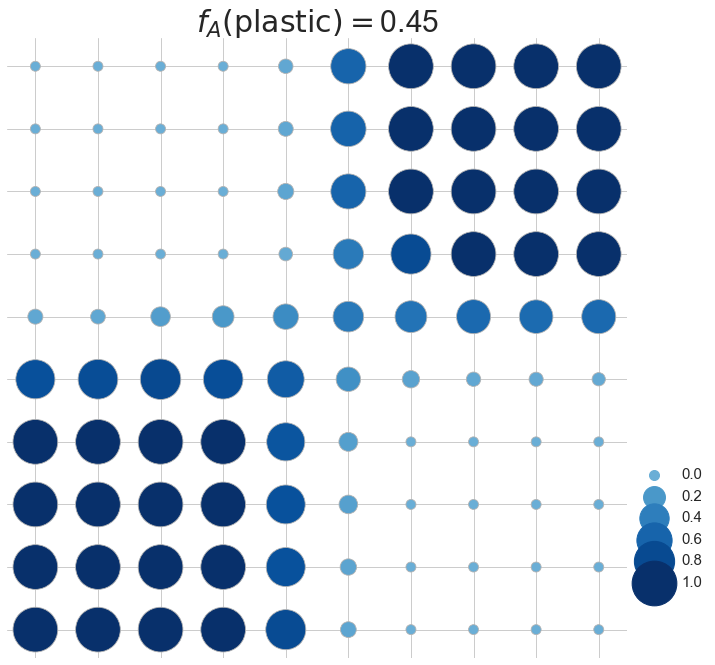

In [21]:
fig = plt.figure(figsize=(dim[0],dim[1]))

name = r'$f_{A}(\mathrm{plastic}) = $' + str(np.round(np.mean(data_A['freq']), decimals=2))

g = sns.relplot(
    data=data_A,
    x="level_0", y="level_1", hue="freq", size="freq",
    palette="Blues", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(100, 2000), size_norm=(0, 1), clip_on=False
)
# Tweak the figure to finalize
#g.set(xlabel="", ylabel=lab_col[bact_s][0], aspect="equal", yticks=range(10), title=name, xticks=range(10), yticklabels=[], xticklabels=[])
g.set(xlabel="", ylabel='', aspect="equal", yticks=range(10), title=name, xticks=range(10), yticklabels=[], xticklabels=[])
g.despine(left=True, bottom=True)

for artist in g.legend.legendHandles:
    artist.set_edgecolor(".8")
    
handles, labels = plt.gca().get_legend_handles_labels()

g._legend.remove()

plt.legend(handles, labels, loc=(1.01,0.1),frameon=False, edgecolor='white', markerscale=1., fontsize=15)

plt.savefig('../fig3c.pdf', bbox_inches='tight', dpi=300)

<Figure size 720x720 with 0 Axes>

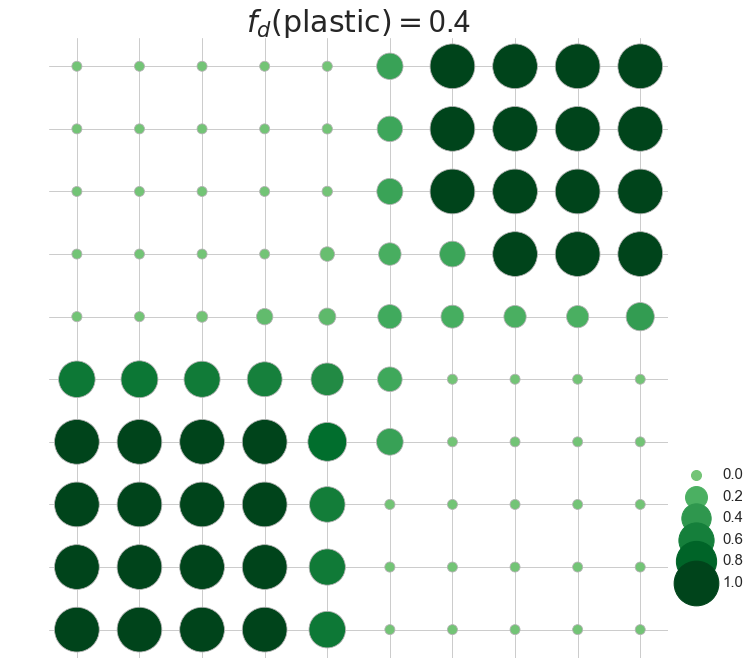

In [22]:
fig = plt.figure(figsize=(10,10))

name = r'$f_{d}(\mathrm{plastic}) = $' + str(np.round(np.mean(data_d['freq']), decimals=2))

g = sns.relplot(
    data=data_d,
    x="level_0", y="level_1", hue="freq", size="freq",
    palette="Greens", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(100, 2000), size_norm=(0, 1), clip_on=False
)
# Tweak the figure to finalize
g.set(xlabel="", ylabel="   ", aspect="equal", yticks=range(10), title=name, xticks=range(10), yticklabels=[], xticklabels=[])
g.despine(left=True, bottom=True)

for artist in g.legend.legendHandles:
    artist.set_edgecolor(".8")
    
handles, labels = plt.gca().get_legend_handles_labels()

g._legend.remove()

plt.legend(handles, labels, loc=(1.01,0.1),frameon=False, edgecolor='white', markerscale=1., fontsize=15)

plt.savefig('../fig3d.pdf', bbox_inches='tight', dpi=300)

In [60]:
dim = (10,10)
f_A_t = []
f_d_t = []
x = np.linspace(0.01, 0.5, 50)
for m_rate in tqdm(x):
    data, index, mdata, pdata = simulate_pop_dynamic('A', 'C', 'quad_2', inti_food=init_food/100., mig_rate=m_rate, n_pop=dim, t=800, predation=True)
    
    data_A = {'level_0': [], 'level_1': [], 'freq': []}
    for i in range(dim[0]):
        for j in range(dim[0]):
            data_A['level_0'].append(i)
            data_A['level_1'].append(j)
            n = float(np.sum(data['pop1'][(i,j)][-1][5:]))
            N = np.sum(data['pop1'][(i,j)][-1][5:]) + np.sum(data['pop2'][(i,j)][-1][5:])
            data_A['freq'].append(n/N)
    data_A = pd.DataFrame(data_A)

    data_d = {'level_0': [], 'level_1': [], 'freq': []}
    for i in range(dim[0]):
        for j in range(dim[0]):
            data_d['level_0'].append(i)
            data_d['level_1'].append(j)
            n = data['pop1'][(i,j)][-1][2]
            N = data['pop1'][(i,j)][-1][2] + data['pop2'][(i,j)][-1][2]
            data_d['freq'].append(n[0]/N[0])
    data_d = pd.DataFrame(data_d)
    
    f_A_t.append(np.mean(data_A['freq']))
    f_d_t.append(np.mean(data_d['freq']))

100%|██████████| 50/50 [07:09<00:00,  8.59s/it]


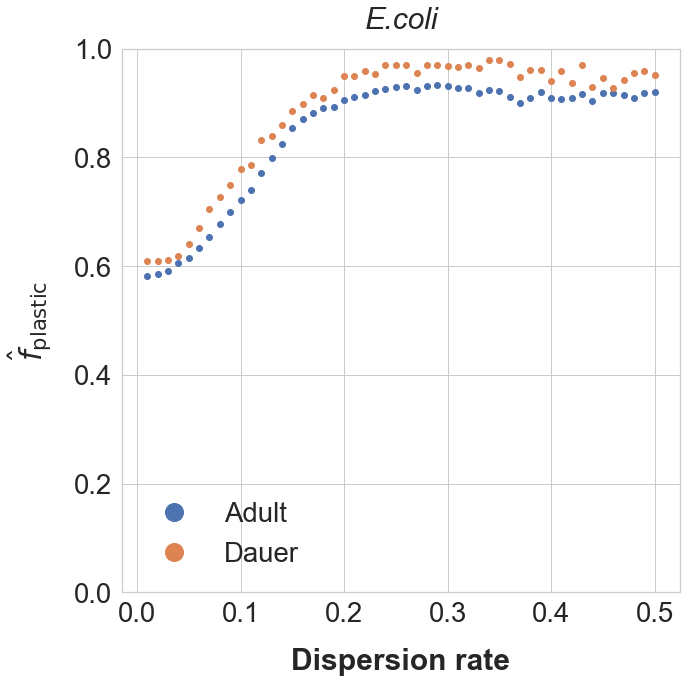

In [54]:
fig = plt.figure(figsize=(10,10))

plt.plot(x, f_A_t, 'o', label='Adult')
plt.plot(x, f_d_t, 'o', label='Dauer')
plt.ylim(0, 1)
plt.legend(frameon=False, markerscale=3)
plt.xlabel('Dispersion rate', fontweight='heavy', labelpad=20)
plt.ylabel(r'$\hat{f}_{\mathrm{plastic}}$', fontweight='heavy', labelpad=20)
plt.title('E.coli', pad=20, style='italic')
plt.savefig('../fig4a.pdf', bbox_inches='tight', dpi=300)

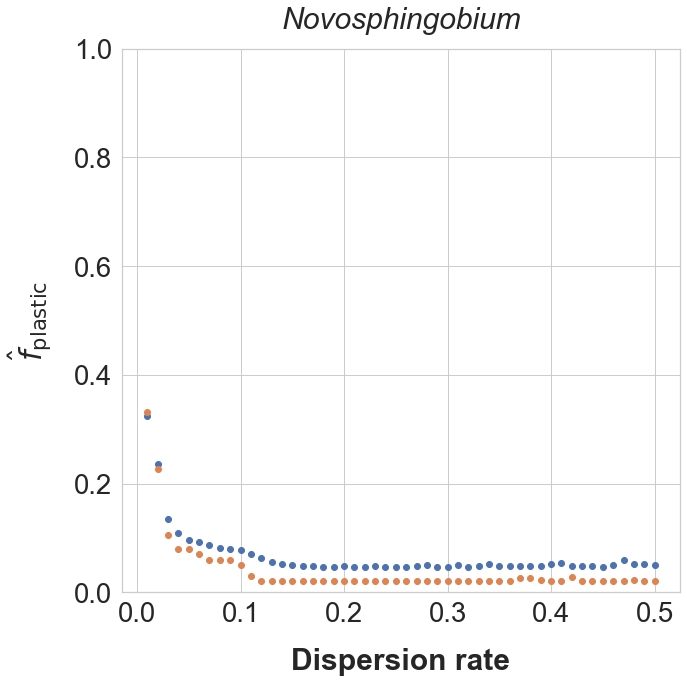

In [57]:
fig = plt.figure(figsize=(10,10))

plt.plot(x, f_A_t, 'o', label='Adult')
plt.plot(x, f_d_t, 'o', label='Dauer')
plt.ylim(0, 1)
# plt.legend(frameon=False, markerscale=3)
plt.xlabel('Dispersion rate', fontweight='heavy', labelpad=20)
plt.ylabel(r'$\hat{f}_{\mathrm{plastic}}$', fontweight='heavy', labelpad=20)
plt.title('Novosphingobium', pad=20, style='italic')
plt.savefig('../fig4b.pdf', bbox_inches='tight', dpi=300)

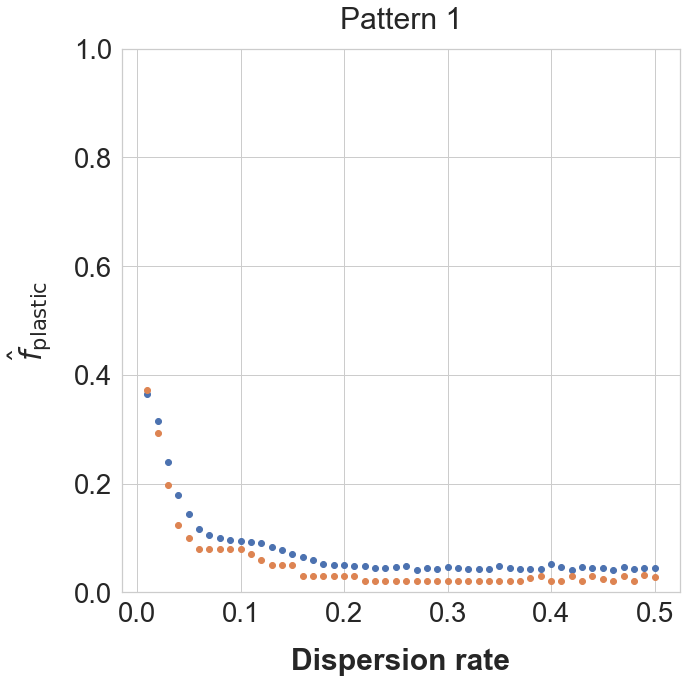

In [59]:
fig = plt.figure(figsize=(10,10))

plt.plot(x, f_A_t, 'o', label='Adult')
plt.plot(x, f_d_t, 'o', label='Dauer')
plt.ylim(0, 1)
# plt.legend(frameon=False, markerscale=3)
plt.xlabel('Dispersion rate', fontweight='heavy', labelpad=20)
plt.ylabel(r'$\hat{f}_{\mathrm{plastic}}$', fontweight='heavy', labelpad=20)
plt.title('Pattern 1', pad=20)
plt.savefig('../fig4c.pdf', bbox_inches='tight', dpi=300)

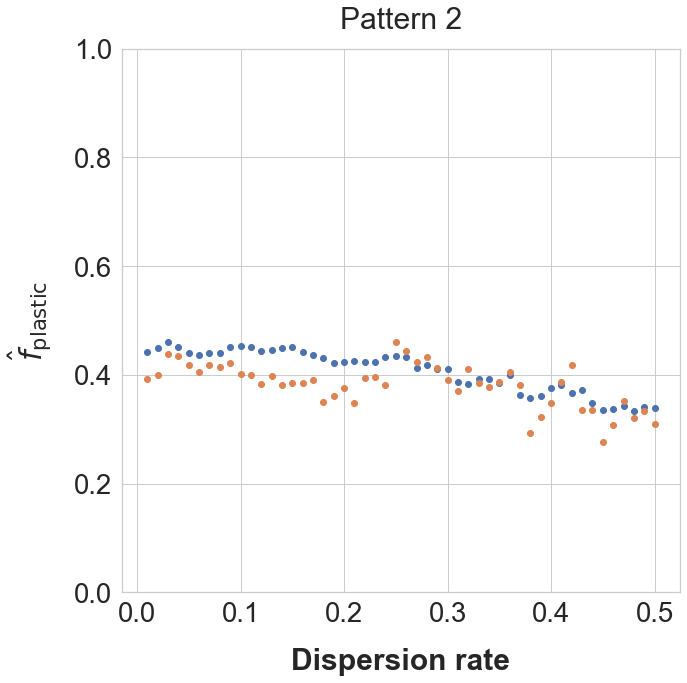

In [61]:
fig = plt.figure(figsize=(10,10))

plt.plot(x, f_A_t, 'o', label='Adult')
plt.plot(x, f_d_t, 'o', label='Dauer')
plt.ylim(0, 1)
# plt.legend(frameon=False, markerscale=3)
plt.xlabel('Dispersion rate', fontweight='heavy', labelpad=20)
plt.ylabel(r'$\hat{f}_{\mathrm{plastic}}$', fontweight='heavy', labelpad=20)
plt.title('Pattern 2', pad=20)
plt.savefig('../fig4d.pdf', bbox_inches='tight', dpi=300)

In [73]:
np.logspace(-10, 1, 10)

array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00, 1.e+01])

In [66]:
np.linspace(1e-8, 50, 20)

array([1.00000000e-03, 2.63252632e+00, 5.26405263e+00, 7.89557895e+00,
       1.05271053e+01, 1.31586316e+01, 1.57901579e+01, 1.84216842e+01,
       2.10532105e+01, 2.36847368e+01, 2.63162632e+01, 2.89477895e+01,
       3.15793158e+01, 3.42108421e+01, 3.68423684e+01, 3.94738947e+01,
       4.21054211e+01, 4.47369474e+01, 4.73684737e+01, 5.00000000e+01])

In [96]:
dim = (10,10)
f_A_t = []
f_d_t = []
x = np.logspace(-8, 1, 50)
for h_rate in tqdm(x):
    data, index, mdata, pdata = simulate_pop_dynamic('A', 'C', 'quad_2', inti_food=init_food/100., mig_rate=0.1, n_pop=dim,  t=800, predation=True, h_time=h_rate)
    
    data_A = {'level_0': [], 'level_1': [], 'freq': []}
    for i in range(dim[0]):
        for j in range(dim[0]):
            data_A['level_0'].append(i)
            data_A['level_1'].append(j)
            n = float(np.sum(data['pop1'][(i,j)][-1][5:]))
            N = np.sum(data['pop1'][(i,j)][-1][5:]) + np.sum(data['pop2'][(i,j)][-1][5:])
            data_A['freq'].append(n/N)
    data_A = pd.DataFrame(data_A)

    data_d = {'level_0': [], 'level_1': [], 'freq': []}
    for i in range(dim[0]):
        for j in range(dim[0]):
            data_d['level_0'].append(i)
            data_d['level_1'].append(j)
            n = data['pop1'][(i,j)][-1][2]
            N = data['pop1'][(i,j)][-1][2] + data['pop2'][(i,j)][-1][2]
            data_d['freq'].append(n[0]/N[0])
    data_d = pd.DataFrame(data_d)
    
    f_A_t.append(np.mean(data_A['freq']))
    f_d_t.append(np.mean(data_d['freq']))

100%|██████████| 50/50 [07:27<00:00,  8.95s/it]


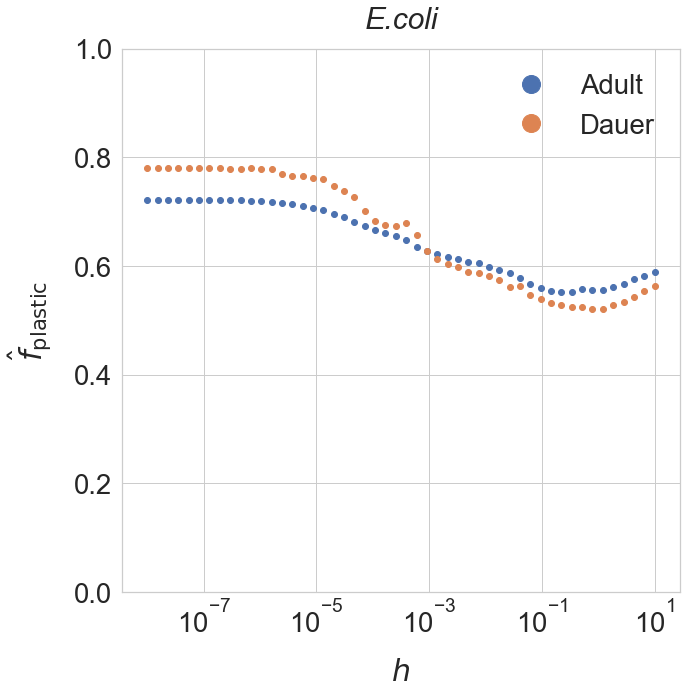

In [91]:
fig = plt.figure(figsize=(10,10))

plt.plot(x, f_A_t, 'o', label='Adult')
plt.plot(x, f_d_t, 'o', label='Dauer')
plt.ylim(0, 1)
plt.xscale('log')
plt.legend(frameon=False, markerscale=3)
plt.xlabel(r'$h$', fontweight='heavy', labelpad=20)
plt.ylabel(r'$\hat{f}_{\mathrm{plastic}}$', fontweight='heavy', labelpad=20)
plt.title('E.coli', pad=20, style='italic')
plt.savefig('../fig5a.pdf', bbox_inches='tight', dpi=300)

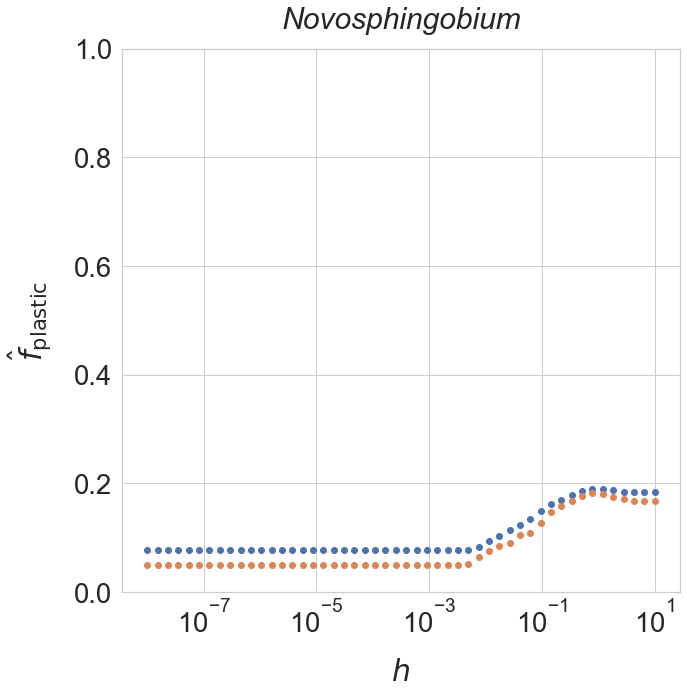

In [93]:
fig = plt.figure(figsize=(10,10))

plt.plot(x, f_A_t, 'o', label='Adult')
plt.plot(x, f_d_t, 'o', label='Dauer')
plt.ylim(0, 1)
plt.xscale('log')
plt.xlabel(r'$h$', fontweight='heavy', labelpad=20)
plt.ylabel(r'$\hat{f}_{\mathrm{plastic}}$', fontweight='heavy', labelpad=20)
plt.title('Novosphingobium', pad=20, style='italic')
plt.savefig('../fig5b.pdf', bbox_inches='tight', dpi=300)

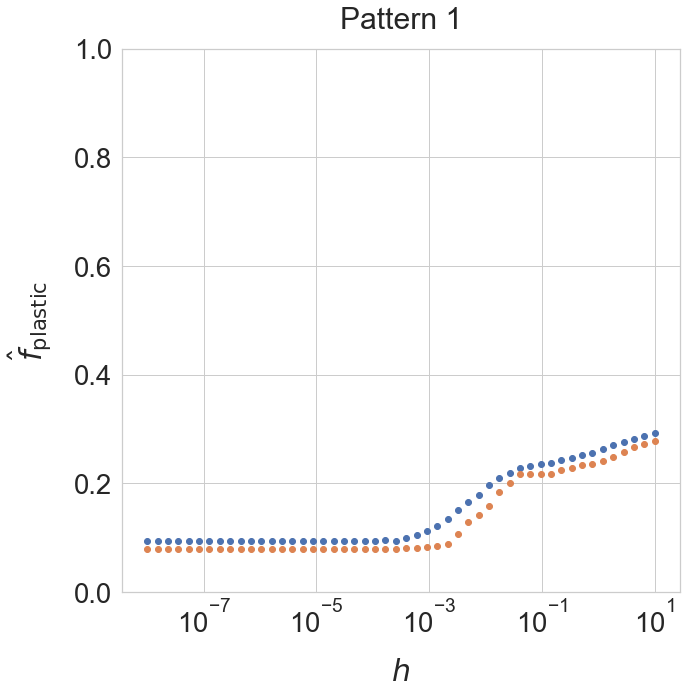

In [95]:
fig = plt.figure(figsize=(10,10))

plt.plot(x, f_A_t, 'o', label='Adult')
plt.plot(x, f_d_t, 'o', label='Dauer')
plt.ylim(0, 1)
plt.xscale('log')
plt.xlabel(r'$h$', fontweight='heavy', labelpad=20)
plt.ylabel(r'$\hat{f}_{\mathrm{plastic}}$', fontweight='heavy', labelpad=20)
plt.title('Pattern 1', pad=20)
plt.savefig('../fig5c.pdf', bbox_inches='tight', dpi=300)

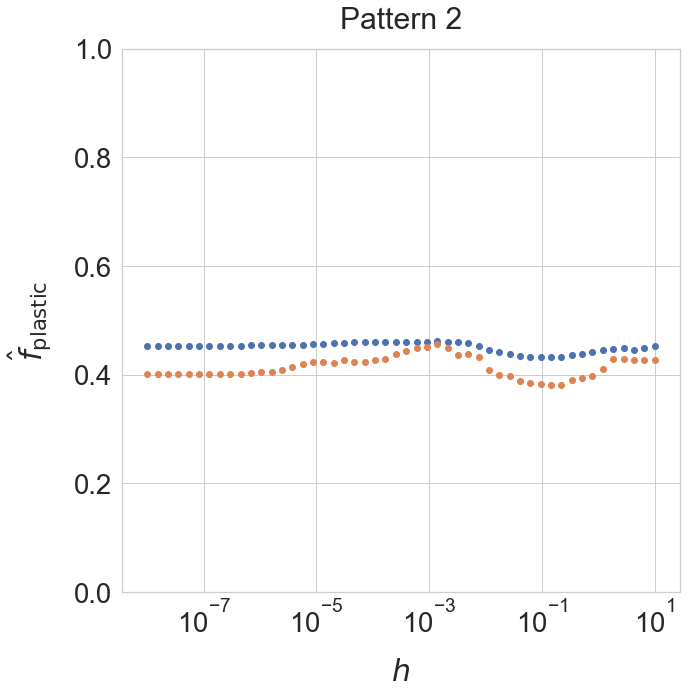

In [97]:
fig = plt.figure(figsize=(10,10))

plt.plot(x, f_A_t, 'o', label='Adult')
plt.plot(x, f_d_t, 'o', label='Dauer')
plt.ylim(0, 1)
plt.xscale('log')
plt.xlabel(r'$h$', fontweight='heavy', labelpad=20)
plt.ylabel(r'$\hat{f}_{\mathrm{plastic}}$', fontweight='heavy', labelpad=20)
plt.title('Pattern 2', pad=20)
plt.savefig('../fig5d.pdf', bbox_inches='tight', dpi=300)

In [1]:
def func_resp(x, a, h=0, c=0, n=2):
    if h == 0 and c==0:
        return a*x
    elif c==0:
        return np.divide(a*x, 1+a*h*x)
    else:
        return np.divide(a* x**n, 1+ c*x + a*h* x**2)

In [2]:
fig = plt.figure(figsize=(10,10))
x = np.linspace(0, 100, 50)
plt.plot(x, [func_resp(i, 0.01) for i in x], lw=5)
plt.plot(x, [func_resp(i, 0.01, 2) for i in x], lw=5)
plt.xlabel('Number of prey')
plt.ylabel('Prey consumed per predator')
plt.yticks(np.linspace(0,1,8), [])
plt.xticks(np.linspace(0,100,8), [])
plt.text(28, 0.5, r'$Y = aX$', size=25)
plt.text(40, 0.31, r'$Y = \frac{aX}{1 + ahX}$', size=25)
plt.savefig('../fig5e.pdf', bbox_inches='tight', dpi=300)

NameError: name 'plt' is not defined

In [137]:
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])